# 1. Preprocessing part

In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [21]:
df['Age']


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [22]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [25]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df.isnull().values.any()

True

In [28]:
df.isnull().sum().sum()

866

In [66]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [41]:
df['Age'].isnull().values.any()

False

In [35]:
df['Age'].mean()

30.354848484848482

In [43]:
median = df['Age'].median()
df['Age'].fillna(median, inplace=True)

In [44]:
df['Age'].mean()

29.36158249158249

In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
df['Cabin'].value_counts()
df['Cabin'].fillna('G6', inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [64]:
df['Embarked'].value_counts()
df.dropna(axis=0, inplace=True)
df.isnull().sum()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. Visualization part


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Age', ylabel='Count'>

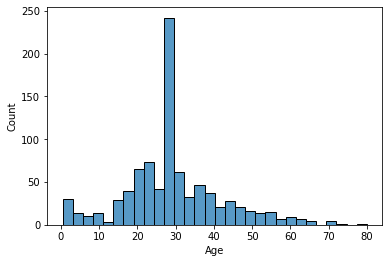

In [87]:
sns.histplot(df['Age'])

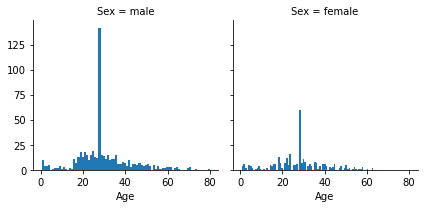

In [89]:
g=sns.FacetGrid(df,col='Sex')
g.map(plt.hist, 'Age',bins=80)

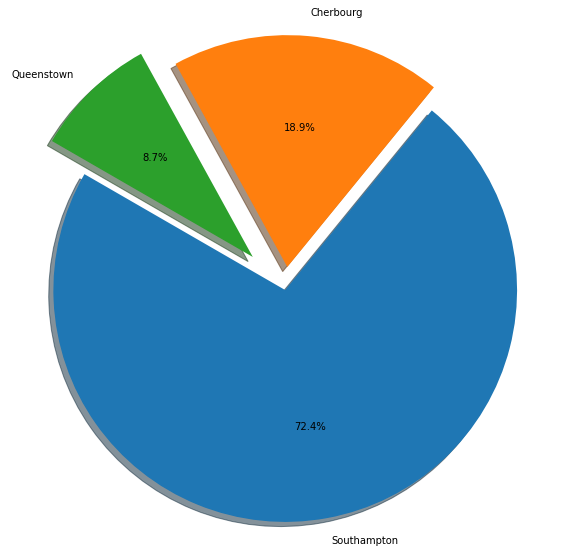

In [90]:
embarked_count=[644,168,77]
department_left=['Southampton','Cherbourg','Queenstown']
explode=[0,0.1,0.2]
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(embarked_count, explode=explode,labels=department_left,autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

C:\Users\AyoubBerrais\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


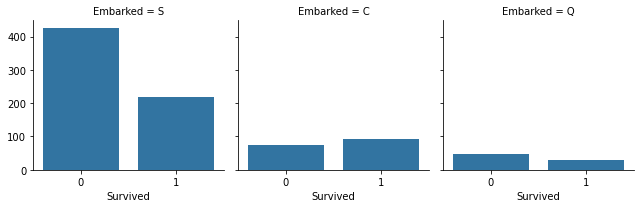

In [92]:
g=sns.FacetGrid(df,col='Embarked')
g.map(sns.countplot, 'Survived')

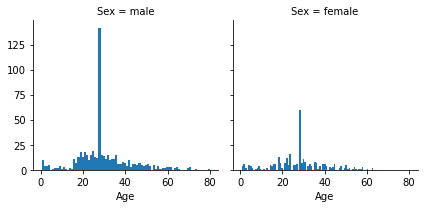

In [94]:
g=sns.FacetGrid(df,col='Sex')
g.map(plt.hist, 'Age',bins=80)

C:\Users\AyoubBerrais\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


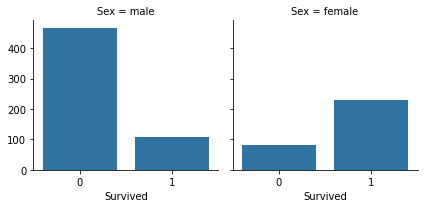

In [96]:
g=sns.FacetGrid(df,col='Sex')
g.map(sns.countplot, 'Survived')

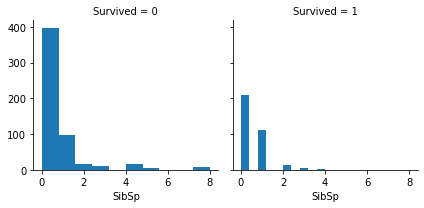

In [98]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist, 'SibSp',bins=10)

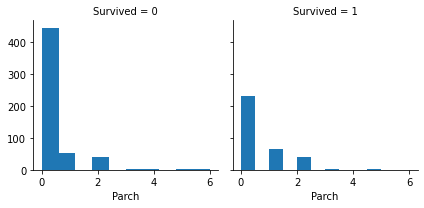

In [100]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist, 'Parch',bins=10)

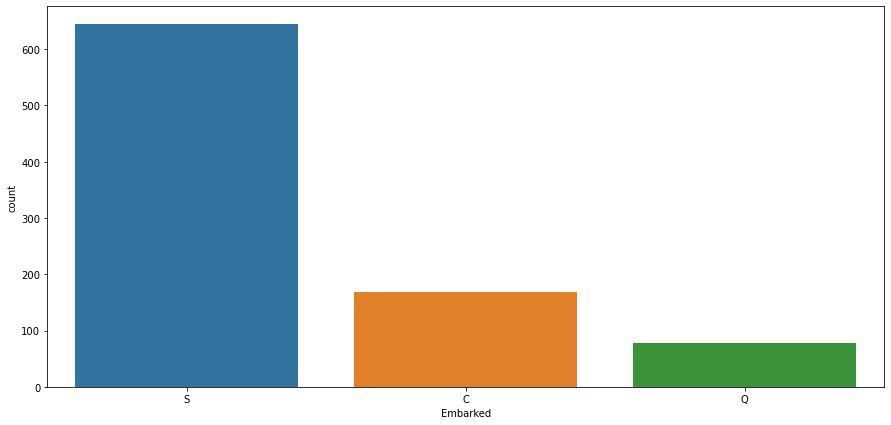

In [102]:

fig = plt.figure(figsize=(15,7))
sns.countplot(x='Embarked',data=df)
plt.show()

<AxesSubplot:xlabel='Sex'>

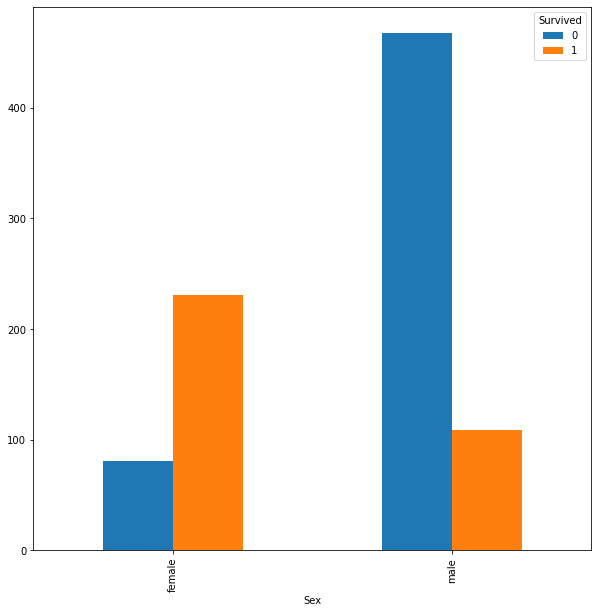

In [104]:
pd.crosstab(df.Sex,df.Survived).plot(kind='bar', figsize=(10,10))

<AxesSubplot:xlabel='Pclass', ylabel='count'>

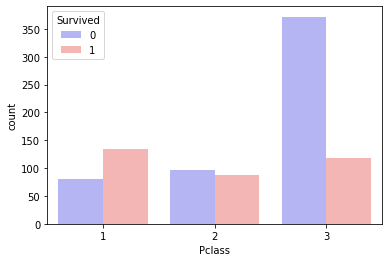

In [106]:
sns.countplot(data = df, x = 'Pclass', hue ='Survived',palette = 'bwr')

In [108]:
df[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [110]:
group=df[df["Survived"]==1][['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

# part 3 

In [111]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 15 , 15 ) )

    cmap = sns.diverging_palette( 255 , 10 , as_cmap = True )

    s =sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = {'fontsize': 12 }

 )
  

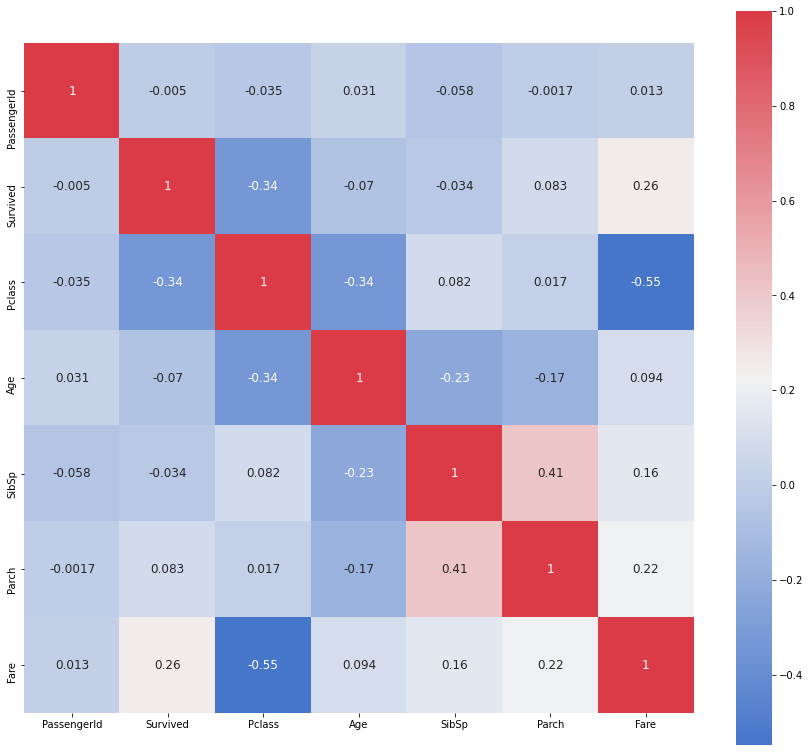

In [113]:
plot_correlation_map(df)

In [115]:
x = pd.get_dummies(df["Sex"])
data=df.drop("Sex", axis = 1) 
data=df.join(x) 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,0,1


In [116]:
y = pd.get_dummies(data["Embarked"])
data=data.drop("Embarked", axis = 1) 
data=data.join(y) 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,0,1,0,0,1


In [117]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'female', 'male', 'C', 'Q', 'S'],
      dtype='object')

In [118]:
new_data=data.drop(['Survived', 'Pclass', 'Name',  'SibSp', 'female','Fare',
       'male', 'C', 'Q', 'S'],axis=1)

new_data.head()

,PassengerId,Sex,Age,Parch,Ticket,Cabin
0,1,male,22.0,0,A/5 21171,G6
1,2,female,38.0,0,PC 17599,C85
2,3,female,26.0,0,STON/O2. 3101282,G6
3,4,female,35.0,0,113803,C123
4,5,male,35.0,0,373450,G6


<AxesSubplot:>

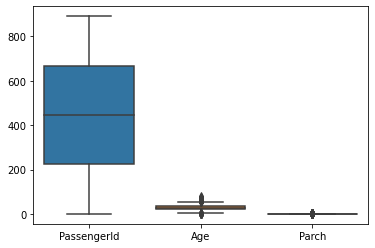

In [119]:
sns.boxplot(data=new_data)

In [120]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler 
# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(data[['Age']])

# Transform the data using the fitted scaler
data['Age_MM'] = MM_scaler.fit_transform(data[['Age']])

# Compare the origional and transformed column
print(data[['Age_MM', 'Age']].head())

     Age_MM   Age
0  0.271174  22.0
1  0.472229  38.0
2  0.321438  26.0
3  0.434531  35.0
4  0.434531  35.0


In [121]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,Age_MM
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,0,1,0,0,1,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,1,0,0,0,1,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,0,1,0,0,1,0.434531


In [122]:
data=data.drop('Age',axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,Age_MM
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,G6,0,1,0,0,1,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,G6,1,0,0,0,1,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,1,0,0,0,1,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,G6,0,1,0,0,1,0.434531


In [123]:
Title=[]
for i in data['Name'] :
    pos1 = i.find(',') 
    pos2 = i.find('.')
    sousChaine = i[pos1+2:pos2]
    Title.append(sousChaine)
    
Title


['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'M

In [124]:
data['Title']=Title

In [125]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,Age_MM,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,G6,0,1,0,0,1,0.271174,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0.472229,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,G6,1,0,0,0,1,0.321438,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,1,0,0,0,1,0.434531,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,G6,0,1,0,0,1,0.434531,Mr


In [126]:
Title_Dictionary = {
                    "Capt":"Officer",
                    "Col": "Officer",
                    "Major": "Officer",
                      "Dr": "Officer",
                    "Rev": "Officer",
                    "Jonkheer": "Royalty",
                    "Don": "Royalty",
                    "Sir" : "Royalty",
                   "Lady" : "Royalty",
                  "the Countess" : "Royalty",
                    "Dona": "Royalty" ,
                    "Mme":  "Miss",
                    "Mlle": "Miss",
                    "Miss" :"Miss",
                    "Ms":  "Mrs",
                    "Mr" : "Mrs",
                    "Mrs" :"Mrs",
                    "Master" :"Master"
                    }
data['Title']=data['Title'].map(Title_Dictionary)

In [127]:
data['Title'].value_counts()

Mrs        642
Miss       184
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [128]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S,Age_MM,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,G6,0,1,0,0,1,0.271174,Mrs
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0.472229,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,G6,1,0,0,0,1,0.321438,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,1,0,0,0,1,0.434531,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,G6,0,1,0,0,1,0.434531,Mrs


In [129]:
data=data.drop("Name", axis = 1)

In [130]:
data['Title'].value_counts()

Mrs        642
Miss       184
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [131]:
familyMembers = data["SibSp"]+data["Parch"]
data=data.drop("SibSp", axis = 1)
data=data.drop("Parch", axis = 1)
data.insert(5, value = familyMembers, column = "Family members")

In [132]:
data.head()

,PassengerId,Survived,Pclass,Sex,Ticket,Family members,Fare,Cabin,female,male,C,Q,S,Age_MM,Title
0,1,0,3,male,A/5 21171,1,7.2500,G6,0,1,0,0,1,0.271174,Mrs
1,2,1,1,female,PC 17599,1,71.2833,C85,1,0,1,0,0,0.472229,Mrs
2,3,1,3,female,STON/O2. 3101282,0,7.9250,G6,1,0,0,0,1,0.321438,Miss
3,4,1,1,female,113803,1,53.1000,C123,1,0,0,0,1,0.434531,Mrs
4,5,0,3,male,373450,0,8.0500,G6,0,1,0,0,1,0.434531,Mrs


In [133]:
data.to_csv('ayoub.csv')

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [135]:
X = data[[ 'Pclass', 'Family members',
       'Age_MM', 'Fare', 'female', 'male', 'C', 'Q', 'S']]
y = data['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3 , random_state=40)

In [136]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
#print(X_test)
#print(y_pred)
print ('accuracy = { :.2f}',format(logreg.score(X_test,y_test)))

accuracy = { :.2f} 0.797752808988764


C:\Users\AyoubBerrais\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
print(logreg.predict([[1,5,0.2,32.00,0,0,0,0,1]]))

[1]


In [138]:
from sklearn  import tree 

In [139]:
classifier = tree.DecisionTreeClassifier('gini','best')
classifier.fit(X_train,y_train)
print ('Score:{}'.format(classifier.score(X_test,y_test)))

Score:0.7752808988764045


C:\Users\AyoubBerrais\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass criterion=gini, splitter=best as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [140]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150)

In [141]:
clf.fit(X_train,y_train)
print ('Score:{}'.format(clf.score(X_test,y_test)))

Score:0.7827715355805244
